# Gamma

In [4]:
import cv2
import numpy as np
import time

def GammaTransorm(image_path, output_path, gamma):
    image = cv2.imread(image_path)
    
    start_time = time.time()
    
    image = image.astype(np.float32) / 255.0

    gamma_corrected = np.power(image, gamma)
    gamma_corrected = (gamma_corrected * 255).astype(np.uint8)
    
    end_time = time.time()
    
    cv2.imwrite(output_path, gamma_corrected)
    
    return (end_time - start_time) * 1000


In [5]:
import os
gt_path = "gt"
origin_path = "images"
output_path = "res"

repeat = 10
time_list = []
os.makedirs(output_path, exist_ok=True)
for i in range(repeat):
    for image_name in os.listdir(gt_path):
        runtime = GammaTransorm(
            image_path=os.path.join(origin_path, image_name), 
            output_path=os.path.join(output_path, 'gamma-'+image_name), 
            gamma=0.3
        )
        time_list.append(runtime)

print(f"Average running time: {sum(time_list)/len(time_list)} ms")

Average running time: 10.137085914611816 ms


# LDR

Contrast enhancement based on layered difference representation of 2D histograms

In [6]:
import os
from CE_LDR.LDR import LDR

gt_path = "gt"
origin_path = "images"
output_path = "res"

repeat = 1
time_list = []
os.makedirs(output_path, exist_ok=True)
for i in range(repeat):
    for image_name in os.listdir(gt_path):
        runtime = LDR(
            image_path=os.path.join(origin_path, image_name),
            output_path=os.path.join(output_path, 'ldr-'+image_name),
            alpha=2.5
        )
        time_list.append(runtime)

print(f"Average running time: {sum(time_list)/len(time_list)} ms")

Average running time: 2531.8400859832764 ms


# MF

A fusion-based enhancing method for weakly illuminated images

In [7]:
import sys
import os
sys.path.append('Multi-scale_FE')
from multi_scale_fe import MF


gt_path = "gt"
origin_path = "images"
output_path = "res"

repeat = 1
time_list = []
os.makedirs(output_path, exist_ok=True)
for i in range(repeat):
    for image_name in os.listdir(gt_path):
        runtime = MF(
            image_path=os.path.join(origin_path, image_name),
            output_path=os.path.join(output_path, 'mf-'+image_name),
            level=3
        )
        time_list.append(runtime)

print(f"Average running time: {sum(time_list)/len(time_list)} ms")

Average running time: 295.8043098449707 ms


# Evaluate

In [1]:
# matlab -batch "run('./metrics.m')"

import subprocess
def call_cmd_command(command):
    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)
    output, error = process.communicate()
    output_str = output.decode('utf-8')
    return output_str, error.decode('utf-8')

matlab_metrics_command = """matlab -batch "run('./metrics.m')"
"""
output = call_cmd_command(matlab_metrics_command)[0]
print(output)


# data = [line.split() for line in output.strip().split("\n")]

# # Separating the data based on the method prefix (gamma, ldr, mf)
# origin_data = [d for d in data if d[0].startswith("origin")]
# gamma_data = [d for d in data if d[0].startswith("gamma")]
# ldr_data = [d for d in data if d[0].startswith("ldr")]
# mf_data = [d for d in data if d[0].startswith("mf")]


# def calculate_average(data, index):
#     return sum(float(d[index]) for d in data) / len(data)

# origin_avg = [calculate_average(origin_data, i) for i in [2, 4, 6]]
# gamma_avg = [calculate_average(gamma_data, i) for i in [2, 4, 6]]
# ldr_avg = [calculate_average(ldr_data, i) for i in [2, 4, 6]]
# mf_avg = [calculate_average(mf_data, i) for i in [2, 4, 6]]


# print(f"ORIGIN: \t MAE: {origin_avg[0]:.3f}, \t GMSD: {origin_avg[1]:.3f}, \t NIQE: {origin_avg[2]:.3f}")
# print(f"GAMMA:  \t MAE: {gamma_avg[0]:.3f}, \t GMSD: {gamma_avg[1]:.3f}, \t NIQE: {gamma_avg[2]:.3f}")
# print(f"LDR:    \t MAE: {ldr_avg[0]:.3f}, \t GMSD: {ldr_avg[1]:.3f}, \t NIQE: {ldr_avg[2]:.3f}")
# print(f"MF:     \t MAE: {mf_avg[0]:.3f}, \t GMSD: {mf_avg[1]:.3f}, \t NIQE: {mf_avg[2]:.3f}")



origin 	 MAE: 78.760357 	 GMSD: 0.203176 	 NIQE: 18.313542
gamma 	 MAE: 21.863418 	 GMSD: 0.083009 	 NIQE: 25.768803
ldr 	 MAE: 31.989632 	 GMSD: 0.064810 	 NIQE: 20.392044
mf 	 MAE: 27.634006 	 GMSD: 0.088221 	 NIQE: 22.601573



# Image

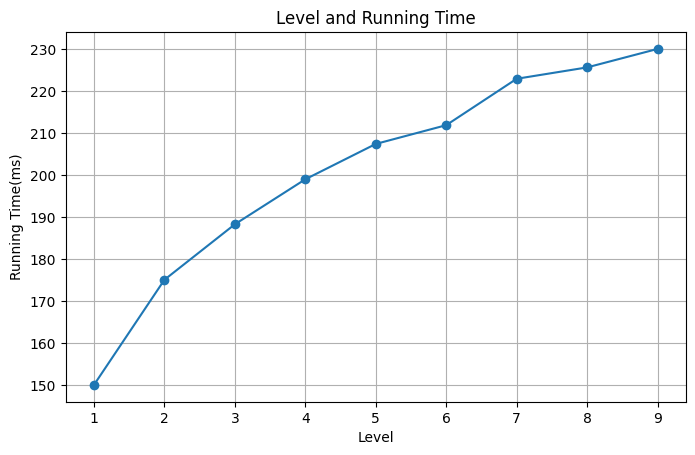

In [7]:
import matplotlib.pyplot as plt

# 数据
data = """1.000 	150.103 
2.000 	175.102 
3.000 	188.302 
4.000 	199.003 
5.000 	207.405 
6.000 	211.869 
7.000 	222.902 
8.000 	225.607 
9.000 	230.000 """

lines = data.strip().split("\n")
x = [float(line.split()[0]) for line in lines]
y = [float(line.split()[1]) for line in lines]

scale_ratio = 0.8
plt.figure(figsize=(10 * scale_ratio, 6 * scale_ratio))
plt.plot(x, y, marker='o')
plt.title("Level and Running Time")
plt.xlabel("Level")
plt.ylabel("Running Time(ms)")
plt.grid(True)
plt.savefig('res/plot.pdf', format='pdf')
plt.show()
